# 1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Set path

In [2]:
path = r'c:\users\saura\onedrive\Desktop\Instacart analysis\df_final_merged.pkl'

# 3. Importing the dataframe

In [3]:
df_final_merged = pd.read_pickle(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data\df_final_merged.pkl')

# 4. Check the output

In [4]:
df_final_merged.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

   order_id  user_id eval_set  order_number  orders_day_of_week  ...  \
0   3139998      138    prior            32                   6  ...   
1   1977647      138    prior            32                   6  ...   
2   3160996      138    prior            32                   5  ...   
3   2254091      138    prior            32                   5  ...   
4    505689      138    prior            32                   6  ...   

   days_since_prior_order_flag  First_Name  Last_Name  Gender      State Age  \
0             Regular_customer     Charles        Cox    Male  Minnesota  81   
1             Regular_customer     Charles        Cox    Male  Minnesota  81   
2             Regular_customer     Charles        Cox    Male  Minnesota  81   
3             Regular_customer     Charles        Cox    Male  Minnesota  81   
4             Regular_customer     Charles        Cox    Male  Minnesota  81   

  date_joined No_of_dependants Maritial_Status  income  
0    8/1/2019                1         married   49620  
1    8/1/2019                1         married   49620  
2    8/1/2019                1         married   49620  
3    8/1/2019                1         married   49620  
4    8/1/2019                1         married   49620  

[5 rows x 35 columns]

# 5. Create a bar chart, a histogram, a scatterplot and a line chart, using a sample subset for the line chart.

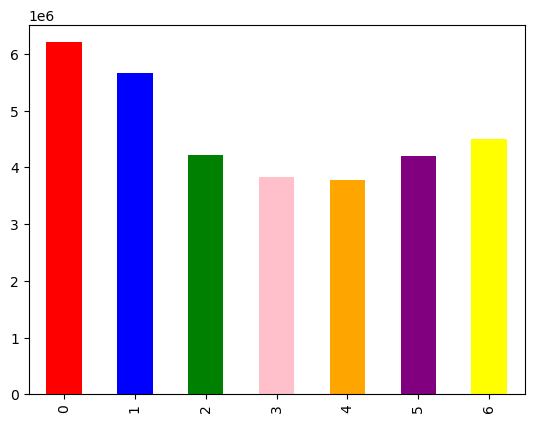

In [5]:
#bar chart
bar = df_final_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','blue','green','pink','orange','purple','yellow'])

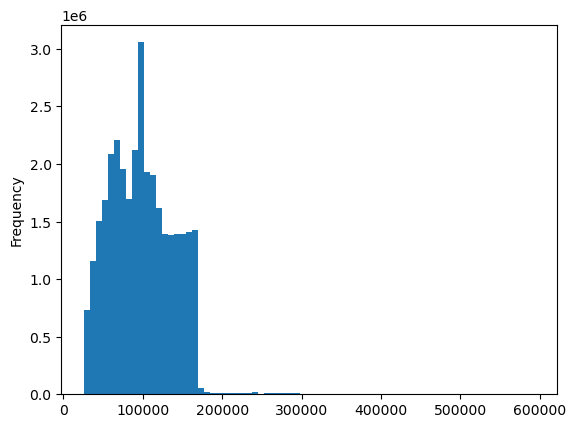

In [6]:
#histogram
hist = df_final_merged['income'].plot.hist(bins=75)

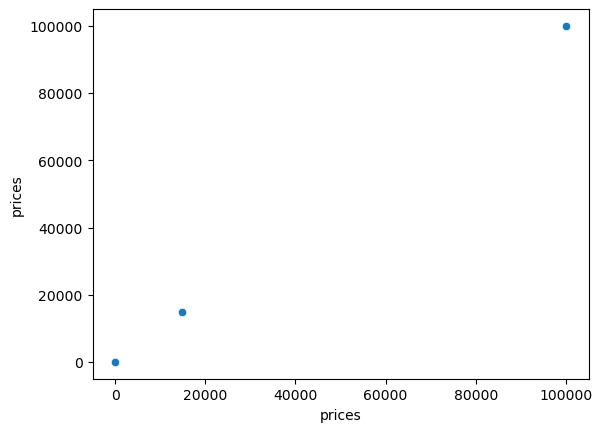

In [7]:
#scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df_final_merged)

In [8]:
#defining  the subset of the df for the linechart(first 1 million)
#creating a random sampling
np.random.seed(4)

In [9]:
dev = np.random.rand(len(df_final_merged)) <= 0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
#splitting the dataframe(70% of the sample in the dataframe)
big = df_final_merged[dev]

In [12]:
small = df_final_merged[~dev]

In [13]:
#checking the execution for accuracy
len(df_final_merged)

32406041

In [14]:
len(big) + len(small)

32406041

In [15]:
#select the columns needed for line plot
df_final_merged_V2 = small[['orders_day_of_week','prices']]

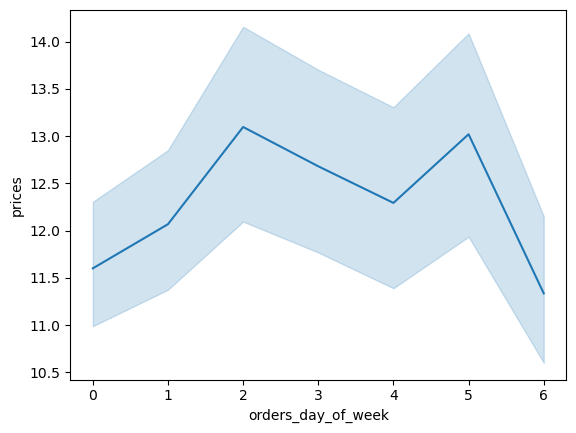

In [16]:
line = sns.lineplot(data = df_final_merged_V2, x = 'orders_day_of_week', y = 'prices')

# You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

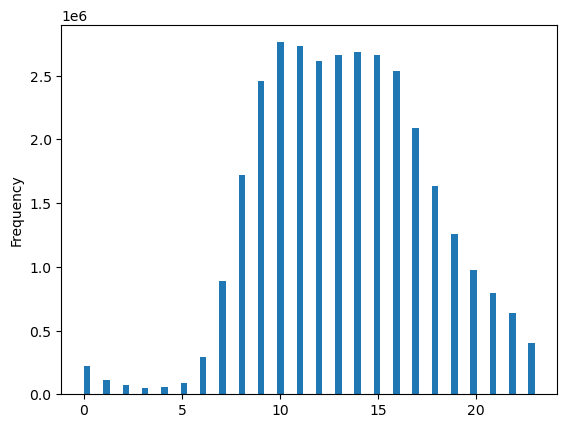

In [36]:
hist_hour = df_final_merged['order_hour_of_day'].plot.hist(bins=70)

In a markdown cell beneath your histogram, describe what the histogram demonstrates.

~ The above histogram represents teh hour of the day(0-23 hour) and the  total amount of orders palced for each hour in million

In [18]:
#checking the histogram accuracy
df_final_merged['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218786
1      115706
2       69377
3       51281
4       53245
5       87964
6      290500
7      891082
8     1718182
9     2454273
10    2761862
11    2736242
12    2618613
13    2661057
14    2689251
15    2662246
16    2535313
17    2087721
18    1636566
19    1258352
20     976182
21     795658
22     634247
23     402335
Name: order_hour_of_day, dtype: int64

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

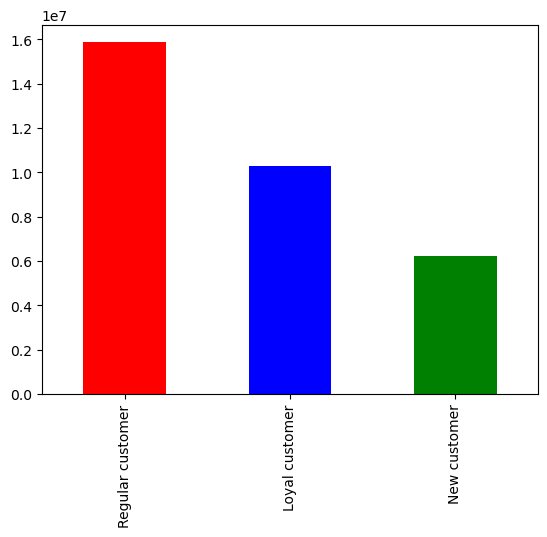

In [19]:
#Plotting bar chart for the loyalty Flag
Loyalty_bar = df_final_merged['loyalty_flag'].value_counts().plot.bar(color =['red','blue','green'])

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [20]:
#using the earlier splitted of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]

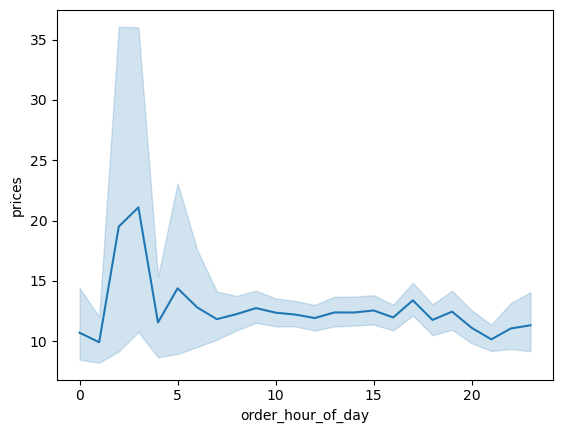

In [21]:
#create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

# Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [22]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small[['No_of_dependants','Age']]

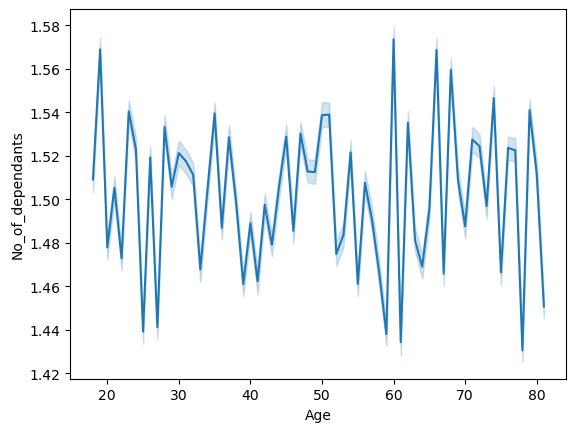

In [23]:
#create a line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'Age', y = 'No_of_dependants')

The above line chart shows the relationship between customer's age and teh number of dependants in each family. However the line shows a distinct relationship between the age of instacart customers and the numbe rof dependant's.

# You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [24]:
#using the earlier splitted data of 30% and selecting the relevant columns
df_income_age = small[['income', 'Age']]

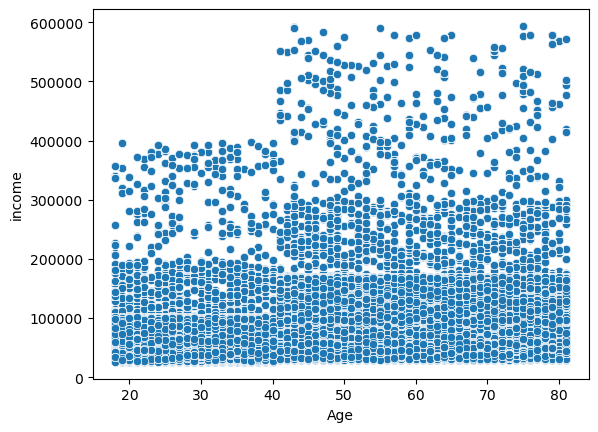

In [25]:
#creating a scatterplot
plot_spending = sns.scatterplot(x= 'Age', y = 'income', data = df_income_age)

# In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

The scatterplot shows the relationship between age and income of Instacart customers. Some facts are explicit from the plot:

1- There are massive concentration of customers across all ages that earns upto 200,000 USD

2- Customers who are 40 years and older are earnign more (upto 600,000 USD)

Therfore, it can be conclusded that Instacart customers 40 years and above have abiltiy to spend more based on their higher income earnings

# Export your visualizations as “.png” files in your relevant project folder.


In [26]:
bar.figure.savefig(os.path.join(r'c:\users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','bar_4_9.png'))

In [37]:
hist.figure.savefig(os.path.join(r'c:\users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','hist_4_9.png'))

In [28]:
splot.figure.savefig(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','splot_4_9.png'))

In [29]:
hist_hour.figure.savefig(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','hist_hour_4_9.png'))

In [30]:
line.figure.savefig(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','line_4_9.png'))

In [31]:
line2.figure.savefig(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','line_price_hour_4_9.png'))

In [32]:
line3.figure.savefig(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','line_age_4_9.png'))

In [33]:
plot_spending.figure.savefig(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','scatter_spending_power_4_9.png'))

In [34]:
Loyalty_bar.figure.savefig(os.path.join(r'c:\Users\saura\onedrive\Desktop\Instacart analysis\Prepared Data','Visualizations','Loyalty_bar_4_9.png'))

In [38]:
#exporting the final dataframe
df_final_merged.to_pickle(os.path.join(r'c:\Users\saura\Onedrive\Desktop\Instacart analysis\Prepared Data','df_final_merged.pkl'))